# DS-SF-23 | Codealong 09 | Introduction to Logistic Regression | Answer Key

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import linear_model

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

## `Iris` dataset, Take 2

In [2]:
df = pd.read_csv('https://github.com/ga-students/DAT-NYC-37/raw/master/lessons/lesson-09/datasets/iris.csv')

In [3]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### Feature matrix and label vector

In [4]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

In [5]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Activity | Create binary/dummy variables for the outcome variable

In [6]:
ys = pd.get_dummies(df.Species, prefix = None)

In [7]:
ys

,Setosa,Versicolor,Virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


## Activity | Run logistic regression to learn whether or not an iris plant is a Setosa

In [8]:
model_Setosa = linear_model.LogisticRegression()

model_Setosa.fit(X, ys.Setosa)

print model_Setosa.coef_
print model_Setosa.intercept_

[[ 0.41498833  1.46129739 -2.26214118 -1.0290951 ]]
[ 0.26560617]


## Activity | What's the accuracy of your model?

In [9]:
model_Setosa.score(X, ys.Setosa)

1.0

## Activity | Plot the log odds (that it is a Setosa) for each plant in the dataset

In [11]:
y_logit_Setosa = model_Setosa.intercept_ + (X * model_Setosa.coef_[0]).sum(axis = 1)

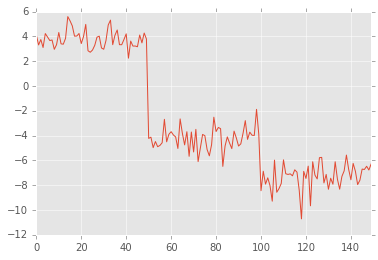

In [12]:
y_logit_Setosa.plot()

## Activity | Using just the log odds, confirm the model accuracy

In [13]:
((y_logit_Setosa >= 0) == (ys.Setosa == 1)).sum()

150

In [14]:
((y_logit_Setosa >= 0) == (ys.Setosa == 1)).mean()

1.0

## Activity | Plot the odds (that it is a Setosa) for each plant in the dataset

In [15]:
y_odds_Setosa = np.exp(y_logit_Setosa)

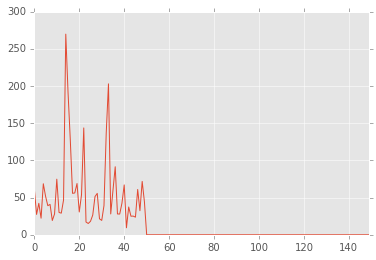

In [16]:
y_odds_Setosa.plot()

## Activity | Now, using just the odds, confirm the model accuracy

In [17]:
((y_odds_Setosa >= 1) == (ys.Setosa == 1)).sum()

150

In [18]:
((y_odds_Setosa >= 1) == (ys.Setosa == 1)).mean()

1.0

## Activity | Plot the class probabilities (that it is a Setosa) for each plant in the dataset

In [19]:
y_p_Setosa = y_odds_Setosa / (1 + y_odds_Setosa)

In [20]:
y_p_Setosa

0      0.984074
1      0.964775
2      0.976924
3      0.957121
4      0.985634
         ...   
145    0.001229
146    0.001190
147    0.001540
148    0.001140
149    0.001849
dtype: float64

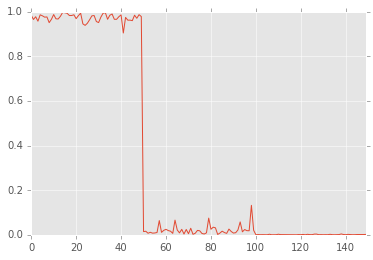

In [21]:
y_p_Setosa.plot()

## Activity | Using the class probabilities, confirm for the last time the model accuracy

In [22]:
((y_p_Setosa >= .5) == (ys.Setosa == 1)).sum()

150

In [23]:
((y_p_Setosa >= .5) == (ys.Setosa == 1)).mean()

1.0

In [24]:
y_p_Setosa

0      0.984074
1      0.964775
2      0.976924
3      0.957121
4      0.985634
         ...   
145    0.001229
146    0.001190
147    0.001540
148    0.001140
149    0.001849
dtype: float64

## Activity | Finally, compute the outcome class for the Setosa model and verify the model accuracy

In [26]:
y_class_Setosa = y_p_Setosa.round()

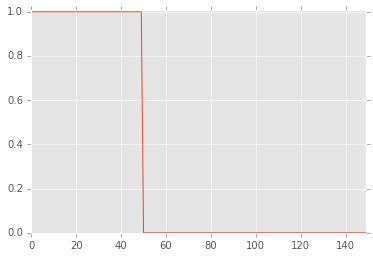

In [27]:
y_class_Setosa.plot(ylim = (0, 1.01))

In [28]:
(y_class_Setosa == ys.Setosa).sum()

150

In [29]:
(y_class_Setosa == ys.Setosa).mean()

1.0

## Versicolor

### Activity

In [30]:
model_Versicolor = linear_model.LogisticRegression()
model_Versicolor.fit(X, ys.Versicolor)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
model_Versicolor.score(X, ys.Versicolor)

0.69999999999999996

In [32]:
y_logit_Versicolor = model_Versicolor.intercept_ + (X * model_Versicolor.coef_[0]).sum(axis = 1)

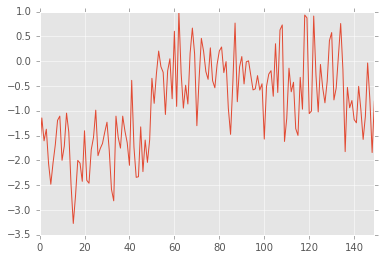

In [33]:
y_logit_Versicolor.plot()

In [34]:
((y_logit_Versicolor >= 0) == (ys.Versicolor == 1)).mean()

0.69999999999999996

In [36]:
((y_logit_Versicolor >= 0) == (ys.Versicolor == 1)).sum()

105

In [37]:
((y_logit_Versicolor >= 0) != (ys.Versicolor == 1)).sum()

45

In [38]:
y_odds_Versicolor = np.exp(y_logit_Versicolor)

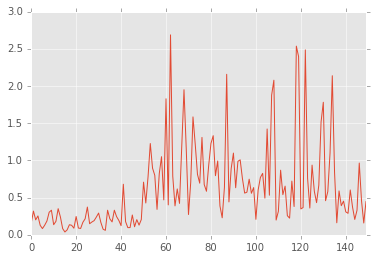

In [39]:
y_odds_Versicolor.plot()

In [40]:
y_p_Versicolor = y_odds_Versicolor / (1 + y_odds_Versicolor)

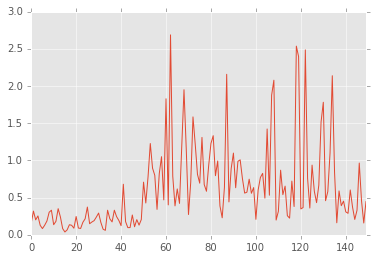

In [41]:
y_odds_Versicolor.plot()

In [42]:
y_class_Versicolor = y_p_Versicolor.round()

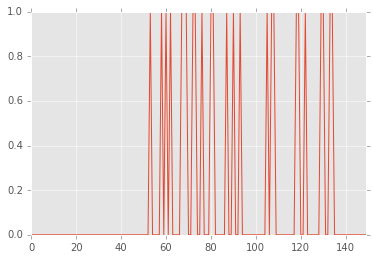

In [43]:
y_class_Versicolor.plot()

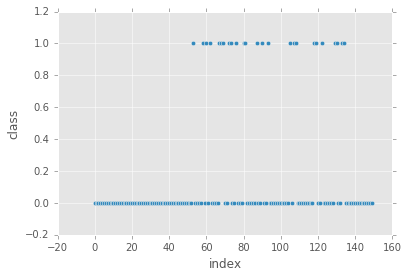

In [44]:
pd.DataFrame({'class': y_class_Versicolor, 'index': y_class_Versicolor.index}).plot(kind = 'scatter', x = 'index', y = 'class')

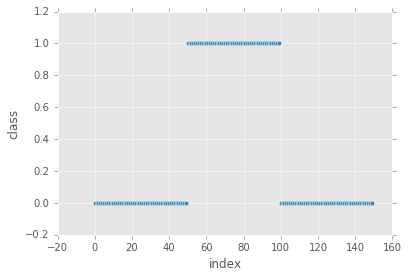

In [45]:
pd.DataFrame({'class': ys.Versicolor, 'index': ys.Versicolor.index}).plot(kind = 'scatter', x = 'index', y = 'class')

## Virginica

### Activity

In [46]:
model_Virginica = linear_model.LogisticRegression().\
    fit(X, ys.Virginica)

In [47]:
model_Virginica.score(X, ys.Virginica)

0.97999999999999998

In [48]:
y_logit_Virginica = model_Virginica.intercept_ + (X * model_Virginica.coef_[0]).sum(axis = 1)

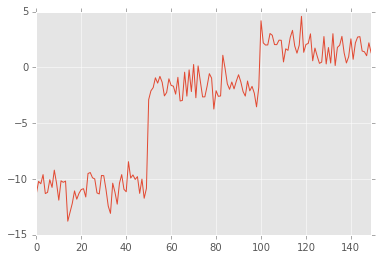

In [49]:
y_logit_Virginica.plot()

In [50]:
((y_logit_Virginica >= 0) == (ys.Virginica == 1)).mean()

0.97999999999999998

In [51]:
((y_logit_Virginica >= 0) == (ys.Virginica == 1)).sum()

147

In [52]:
((y_logit_Virginica >= 0) != (ys.Virginica == 1)).sum()

3

In [53]:
y_odds_Virginica = np.exp(y_logit_Virginica)

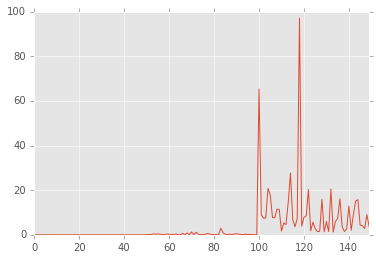

In [54]:
y_odds_Virginica.plot()

In [55]:
y_p_Virginica = y_odds_Virginica / (1 + y_odds_Virginica)

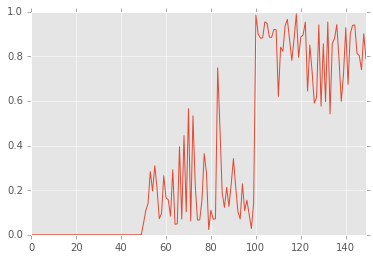

In [56]:
y_p_Virginica.plot()

In [57]:
y_class_Virginica = y_p_Virginica.round()

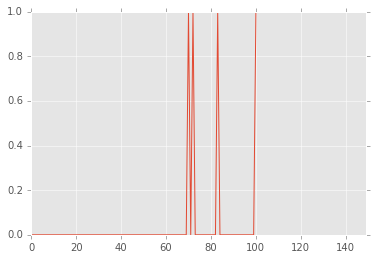

In [58]:
y_class_Virginica.plot()

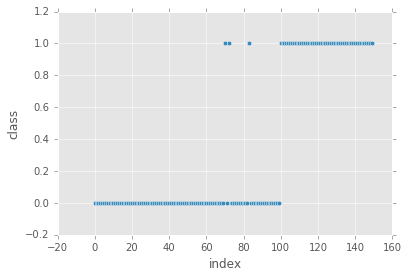

In [59]:
pd.DataFrame({'class': y_class_Virginica, 'index': y_class_Virginica.index}).plot(kind = 'scatter', x = 'index', y = 'class')

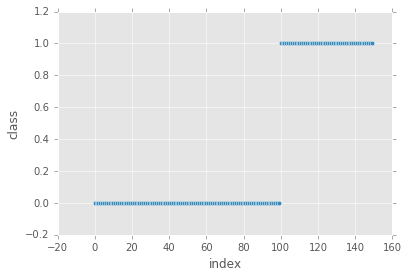

In [60]:
pd.DataFrame({'class': ys.Virginica, 'index': ys.Virginica.index}).plot(kind = 'scatter', x = 'index', y = 'class')

## Activity | Let's combine the models together!

In [61]:
y_hats = pd.DataFrame({'Setosa': y_class_Setosa, 'Versicolor': y_class_Versicolor, 'Virginica': y_class_Virginica})

In [62]:
y_hats.sum()

Setosa        50.0
Versicolor    25.0
Virginica     53.0
dtype: float64

In [63]:
y_hats.sum().sum()

128.0

In [64]:
y_hats.sum(axis = 1).value_counts()

1.0    106
0.0     33
2.0     11
dtype: int64

In [65]:
y_hats = pd.DataFrame({'Setosa': y_p_Setosa, 'Versicolor': y_p_Versicolor, 'Virginica': y_p_Virginica})

y_hats['p'] = y_hats.max(axis = 1)

y_hats['Class'] = 'Setosa'
y_hats.loc[y_hats.Versicolor == y_hats.p, 'Class'] = 'Versicolor'
y_hats.loc[y_hats.Virginica == y_hats.p, 'Class'] = 'Virginica'

In [66]:
y_hats

,Setosa,Versicolor,Virginica,p,Class
0,0.984074,0.134585,0.000012,0.984074,Setosa
1,0.964775,0.241600,0.000037,0.964775,Setosa
2,0.976924,0.167258,0.000030,0.976924,Setosa
3,0.957121,0.202420,0.000067,0.957121,Setosa
4,0.985634,0.112769,0.000012,0.985634,Setosa
...,...,...,...,...,...
145,0.001229,0.248149,0.812828,0.812828,Virginica
146,0.001190,0.490985,0.802547,0.802547,Virginica
147,0.001540,0.315145,0.739502,0.739502,Virginica
148,0.001140,0.136859,0.900496,0.900496,Virginica


In [67]:
(y_hats.Class == df.Species).mean()

0.95999999999999996

In [68]:
(y_hats.Class == df.Species).sum()

144

In [69]:
(y_hats.Class != df.Species).sum()

6